In [15]:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
import statistics

In [8]:
df =  sns.load_dataset("tips")

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
np.mean(df['total_bill'])

19.78594262295082

In [11]:
np.median(df['total_bill'])

17.795

In [12]:
statistics.mode(df['total_bill'])

13.42

In [13]:
sns.boxplot(df['total_bill'])

<Axes: ylabel='total_bill'>

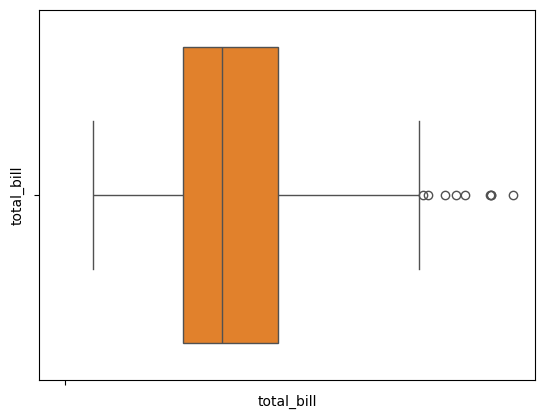

In [14]:
sns.boxplot(x="total_bill", data=df)
plt.show()

In [16]:
np.mode(df['total_bill'])

AttributeError: module 'numpy' has no attribute 'mode'

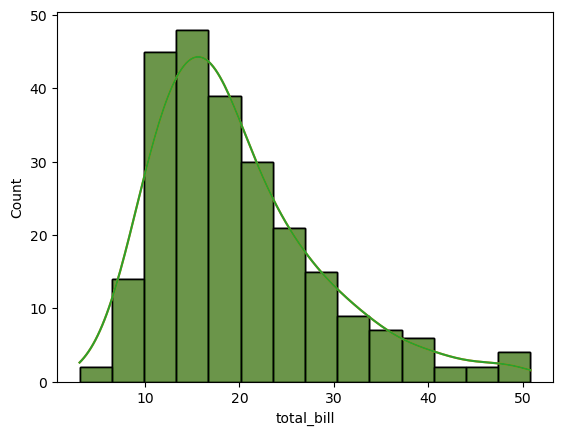

In [19]:
sns.histplot(x="total_bill",data=df, kde=True)
plt.show()

In [21]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
df1 = sns.load_dataset('iris')

In [25]:
sns.histplot(x="sepal_length" , data = df1 , kde = True )

<Axes: xlabel='sepal_length', ylabel='Count'>

In [26]:
sns.histplot(df1["sepal_length"], kde=True)

<Axes: xlabel='sepal_length', ylabel='Count'>

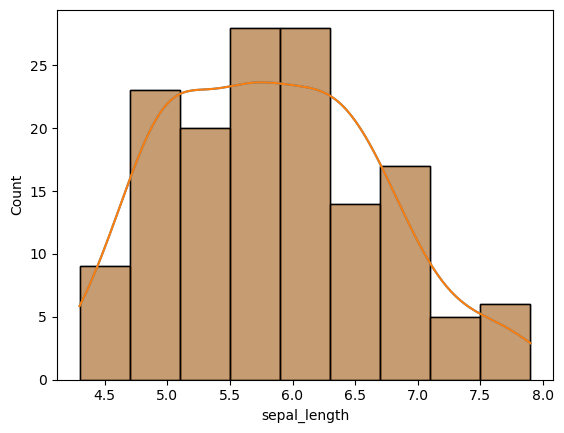

In [27]:
plt.show()

In [28]:
sns.histplot(df1["sepal_width"], kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

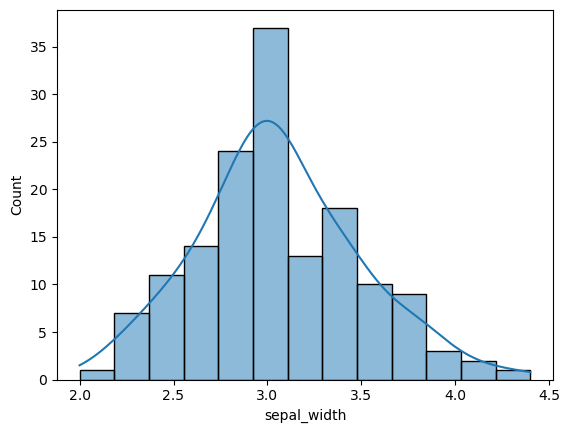

In [29]:
plt.show()

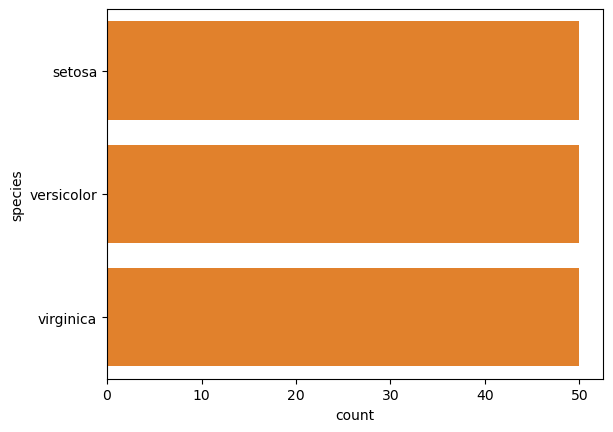

In [32]:
sns.countplot(df1["species"])
plt.show()

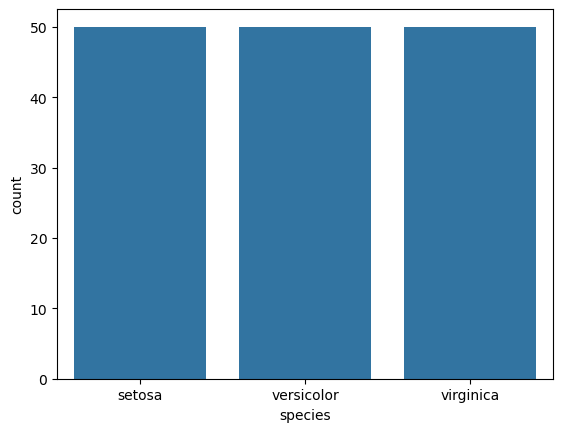

In [34]:
sns.countplot( x ="species", data=df1)
plt.show()

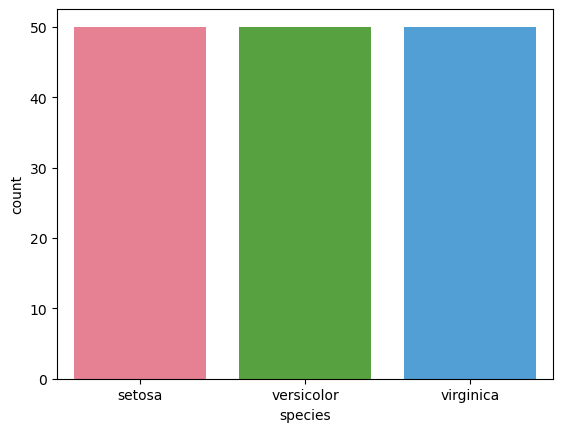

In [42]:

sns.countplot(x="species", data=df1, hue="species", palette="husl", legend=False)

plt.show()  # This ensures the plot is displayed


In [45]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

## OUTLIERs

In [46]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
     

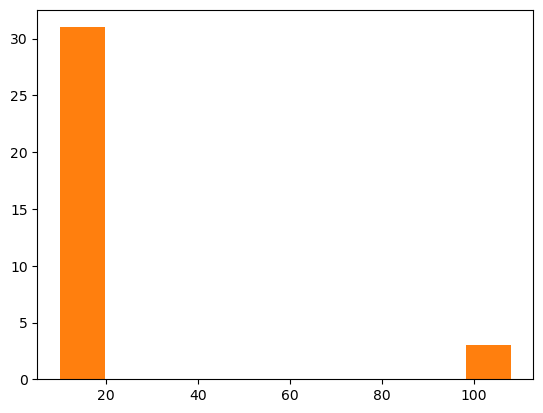

In [48]:
plt.hist(dataset)
plt.show()

In [53]:
#calculating z-score and find the outliers

outliers=[]

def detect_outliers(data):
    threshold=3   ##beyond third standard deviation
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)> threshold:
            outliers.append(i)

    return outliers
    

In [54]:
detect_outliers(dataset)

[102, 107, 108]

IQR ( Inter quartile Range)

1. Sort the data
2. Calculate Q1 and Q3
3. IQR(Q3-Q1)
4. find the lower Fence(Q1 - 1.5(IQR))
5. find the upper fence(Q3 + 1.5(IQR))




In [55]:
Dataset =  sorted(dataset)

In [56]:
Dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [63]:
Q1 , Q3 = np.percentile(dataset,[25,75])

In [64]:
print (Q1, Q3)

12.0 15.0


In [65]:
## FInd the lower fence and Higher Fence 

IQR = Q3 - Q1

In [66]:
IQR

3.0

In [67]:
lower_fence = Q1 - (1.5*IQR)
higher_fence = Q3 + (1.5*IQR)

In [68]:
print(lower_fence , higher_fence)

7.5 19.5


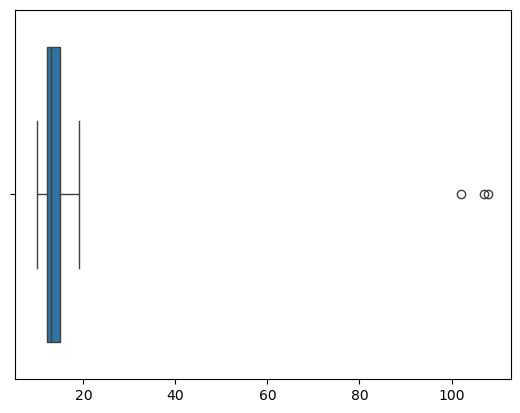

In [75]:
sns.boxplot( data = Dataset ,  orient="h")
plt.show()

Suppose the IQ in a certain population is normally distributed with a mean of μ=100 and standard deviation of σ = 15 . A researcher wants to know if a new drug affects IQ levels , so he recruit 20 patients to try it and record their IQ levels. The following code shows how to perform a one sample z-test in Python to determine if the new drug causes a significant difference in IQ levels:

In [76]:
from statsmodels.stats.weightstats import ztest as ztest

In [79]:
#enter IQ Levels for 20 patients

data = [88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]

ztest(data,value=100)

(1.5976240527147705, 0.1101266701438426)

z-score = 1.5976240527147705, p-value = 0.1101266701438426)


The significance level and p-value are both measures used in statistical hypothesis testing but represent different concepts. The significance level is a predetermined threshold used to assess the strength of evidence against the null hypothesis. At the same time, the p-value is a continuous measure that provides information about the strength of evidence against the null hypothesis and allows us to assess the statistical significance of the results.



## What a p-value tells you

A p-value, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e., that the null hypothesis is true).

The level of statistical significance is often expressed as a p-value between 0 and 1.

The smaller the p-value, the less likely the results occurred by random chance, and the stronger the evidence that you should reject the null hypothesis.

Remember, a p-value doesn’t tell you if the null hypothesis is true or false. It just tells you how likely you’d see the data you observed (or more extreme data) if the null hypothesis was true. It’s a piece of evidence, not a definitive proof.

a p-value of 0.001 means there is only a 0.1% chance of obtaining a result at least as extreme as the one observed, assuming the null hypothesis is correct.

Such a small p-value provides strong evidence against the null hypothesis, leading to rejecting the null in favor of the alternative hypothesis.

A p-value more than the significance level (typically p > 0.05) is not statistically significant and indicates strong evidence for the null hypothesis.

This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis; we can only reject it or fail to reject it.

Note: when the p-value is above your threshold of significance, it does not mean that there is a 95% probability that the alternative hypothesis is true.

In [80]:
ztest(data,value=110)

(-3.640487595530384, 0.00027212221833431376)

In [81]:
 ## T- test

ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [82]:
import numpy as np
ages_mean = np.mean(ages)

In [83]:
ages_mean

29.848484848484848

In [84]:
sample_size = 10
age_sample = np.random.choice(ages, sample_size)

In [87]:
age_sample

array([18, 19, 40, 43, 19, 21, 28, 20, 18, 20])

In [89]:
np.mean(age_sample)

24.6

T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.


##  One-sample T-test with Python

A one-sample t-test determines if the mean of a single sample is significantly different from a known population mean. 


The formula for a one-sample t-test is t = (M - μ) / (σ / √n). 


What the variables in the formula mean 
M: The sample mean,
μ: The population mean, 
σ: The standard deviation of the sample, 
n: The sample size


How to perform a one-sample t-test 
1. Calculate the sample mean
2. Calculate the sample standard deviation
3. Calculate the test statistic using the formula t = (M - μ) / (σ / √n)
4. Calculate the probability of observing the test statistic under the null hypothesis

In [94]:
from scipy.stats import ttest_1samp 

In [91]:
ttest_1samp(age_sample, 30)

TtestResult(statistic=-1.8198801209749604, pvalue=0.10212267581064625, df=9)

In [92]:
ttest_1samp(age_sample, 31)

TtestResult(statistic=-2.1568949581925456, pvalue=0.05936676492559947, df=9)

In [93]:
ttest_1samp(age_sample, 25)

TtestResult(statistic=-0.13480593488703366, pvalue=0.8957319814461362, df=9)

## Some More Examples
Consider the age of students in a college and in Class A

In [95]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

Understanding the Parameters


stats.poisson.rvs(mu, size)

Generates random values from a Poisson distribution.

1. mu: The expected value (mean) of the Poisson distribution.
2. size: The number of random values to generate.
3. loc=18 (Shifts the distribution)

The Poisson distribution is non-negative (starts at 0).

loc=18 shifts the entire distribution by adding 18 to every generated value.

So, the actual mean age becomes (35 + 18) = 53 for school_ages and (30 + 18) = 48 for classA_ages.

In [96]:
school_ages

array([62, 59, 44, ..., 45, 52, 50], dtype=int64)

In [97]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45], dtype=int64)

In [98]:
classA_ages.mean()

46.9

In [99]:
ttest_1samp(classA_ages , popmean=school_ages.mean())

TtestResult(statistic=-9.604796510704091, pvalue=1.139027071016194e-13, df=59)

In [100]:
school_ages.mean()

53.303333333333335

In [102]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

What This Does

1. classA_ages: Sample data (ages of students in Class A).
2. school_ages.mean(): The population mean (average age of all students in the school).
3. The null hypothesis (H₀): The mean age of Class A is the same as the school’s average age.
4. The alternative hypothesis (H₁): The mean age of Class A is different from the school’s average age.

### Interpreting the p_value
If p-value < 0.05 (assuming α = 0.05), we reject H₀ → Class A’s average age significantly differs from the school’s average.

If p-value ≥ 0.05, we fail to reject H₀ → No significant difference between Class A and the school’s average age.

Here, _ is a placeholder for the t-statistic, which is ignored.

In [103]:
p_value

1.139027071016194e-13

In [104]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

The formula for a two-sample t-test is T = (X1 – X2) / s√(1/n1 + 1/n2). 

X1 and X2: The means of the two samples, 
s: The estimate of the common standard deviation of the two samples , 
n1 and n2: The number of observations in each sample


### How do you use the formula?

Gather the sample data,
Define the hypotheses,
Calculate the test statistic t,
Calculate the p-value of the test statistic t,
Draw a conclusion.


What is a two-sample t-test used for?

A two-sample t-test is used to determine if the means of two populations are equal. It can also be used to determine if the mean of a numerical outcome variable differs across two independent groups. 

In [118]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

np.random.seed(12) sets the seed for NumPy's random number generator.

Purpose:

1. Ensures that the same random numbers are generated each time the code runs.
2. Useful for reproducibility, especially in statistical analysis and machine learning.

In [119]:
classA_height = stats.poisson.rvs(loc=140, mu=10, size=60)  # Heights in cm
print(classA_height.mean())  # Checking the average height

149.51666666666668


In [120]:
_,p_value=stats.ttest_ind(a=classA_height,b=ClassB_ages,equal_var=False)

In [121]:
p_value

2.672791959412508e-94

In [122]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [123]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [124]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[15.6935255  29.57494424 21.69611891 33.17300315 32.4501934  34.44001222
 27.12757231 40.9452304  32.20553787 30.30617783 25.46157841 24.77024357
 30.87273514 22.93266549 28.67042287]


In [125]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [126]:
weight_df

,weight_10,weight_20,weight_change
0,25,15.693525,-9.306475
1,30,29.574944,-0.425056
2,28,21.696119,-6.303881
3,35,33.173003,-1.826997
4,28,32.450193,4.450193
5,34,34.440012,0.440012
6,26,27.127572,1.127572
7,29,40.945230,11.945230
8,30,32.205538,2.205538
9,26,30.306178,4.306178


In [127]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [129]:
p_value

0.3274109505482199

In [130]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


 ## Chi-Square Test- 

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

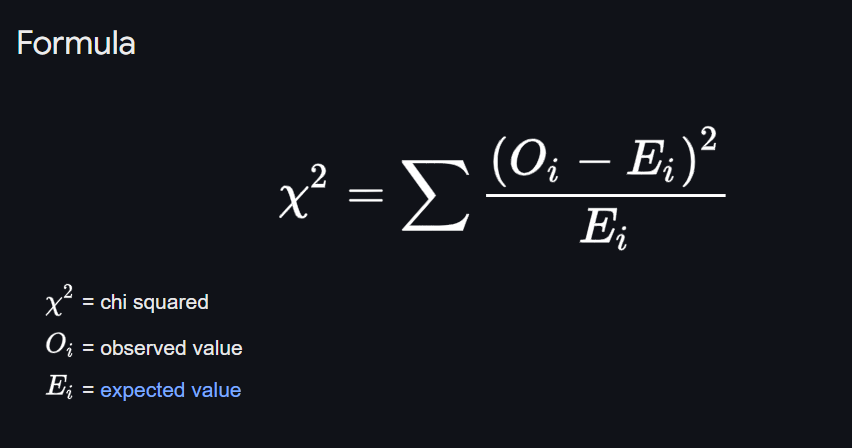

In [131]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')

In [132]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [133]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [134]:
dataset_table.values 

array([[60, 97],
       [33, 54]], dtype=int64)

In [135]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [149]:
# Perform Chi-Square test
chi2_stat, p_value, dof, Expected_Values = stats.chi2_contingency(dataset_table)

# Display Expected Values
Expected_values = np.round(Expected_Values, 2)  # Rounding for better readability
print("Expected Values:\n", Expected_Values)

Expected Values:
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [150]:
val=stats.chi2_contingency(dataset_table) 
# Computes the Chi-Square statistic to check if two categorical variables are independent.

In [151]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [152]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [153]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [154]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [155]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [156]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [157]:
import seaborn as sns
df=sns.load_dataset('iris')

In [158]:
df.shape

(150, 5)

In [160]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [161]:
df_clean = df.drop(columns=['species'])  # Drop the categorical column
correlation_matrix = df_clean.corr()
print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


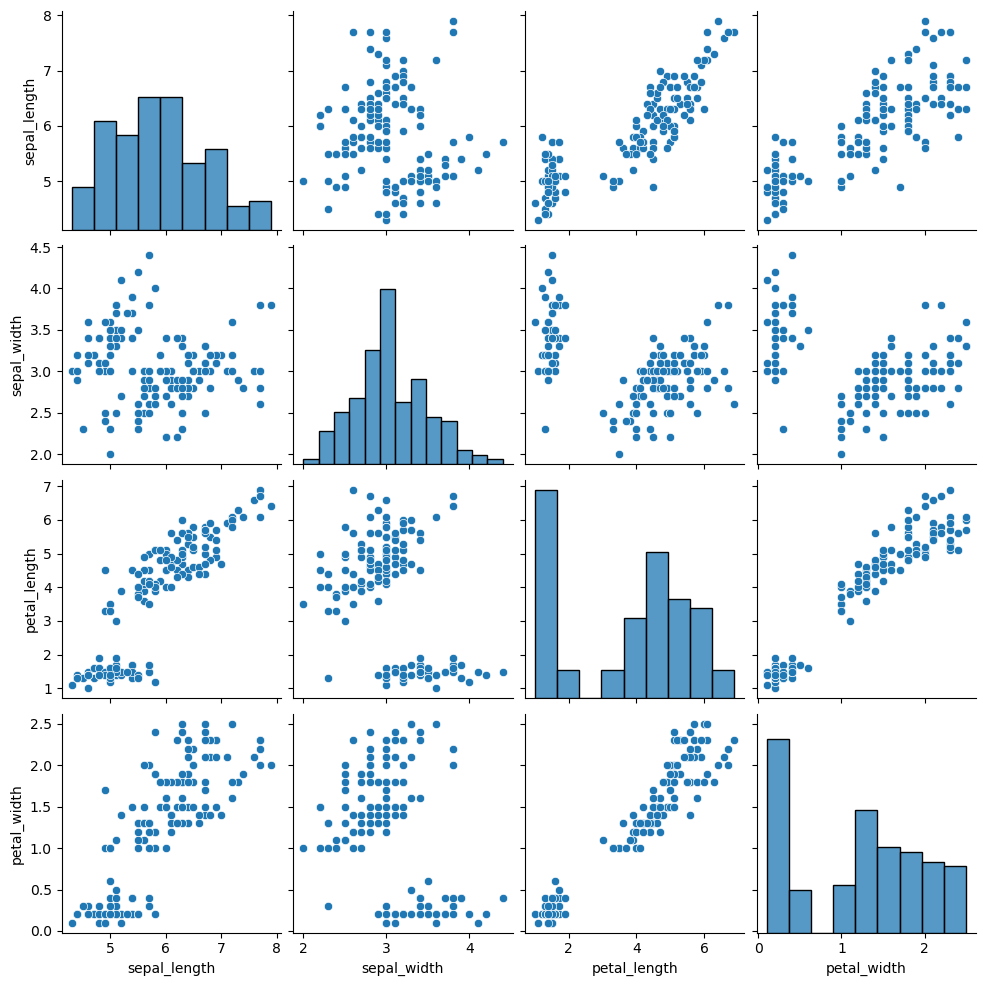

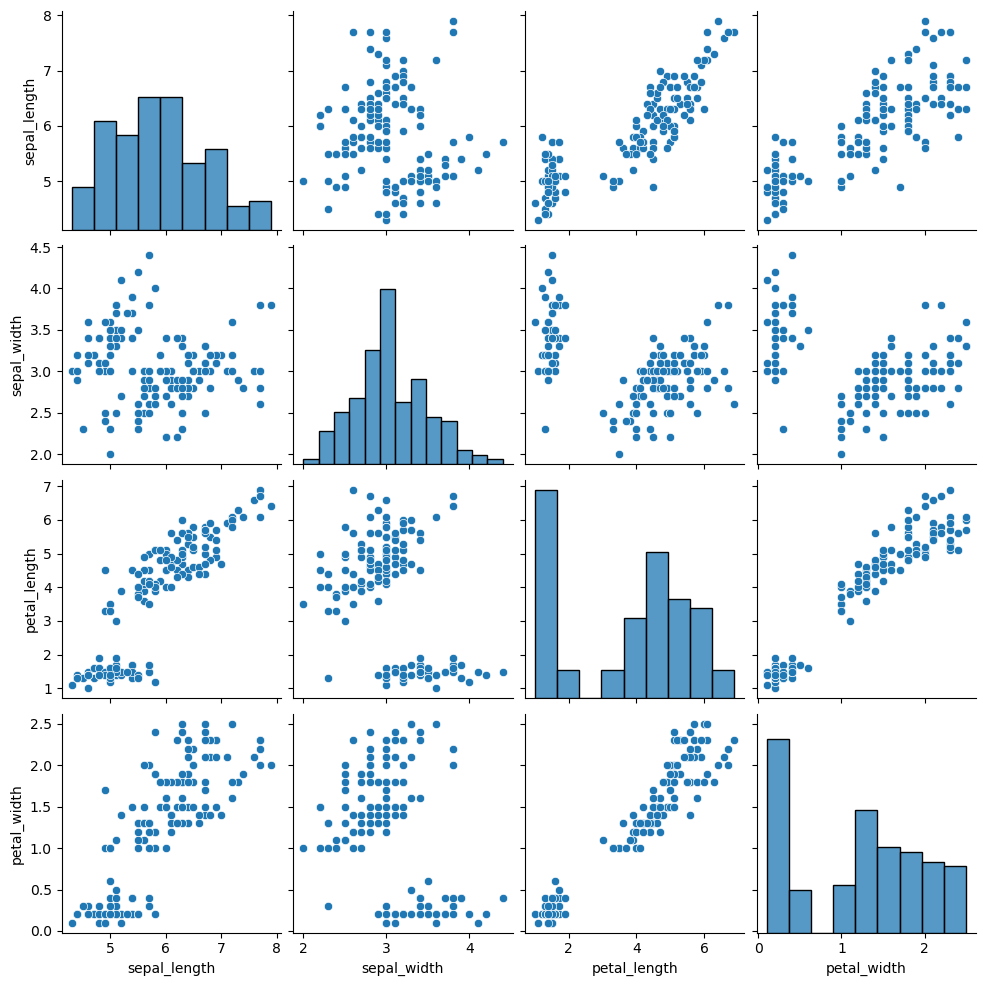

In [163]:
sns.pairplot(df)
plt.show()

## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [164]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [165]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [166]:
df_anova = df1[['petal_width','species']]

In [167]:
grps = pd.unique(df_anova.species.values)

In [168]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [169]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

#creating a dictionary comprehension that groups petal_width values by the unique values in the species column. 

In [170]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [171]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

# stats.f_oneway(): Performs a one-way ANOVA test. Compares the means of multiple groups (here, setosa, versicolor, virginica).

In [172]:
print(p)

4.169445839443116e-85


In [173]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


### Interpreting the Results

If p < 0.05:

Reject the null hypothesis (H₀: The means are equal).

Conclusion: At least one species has a significantly different petal width.


If p ≥ 0.05:

Fail to reject H₀.

Conclusion: No significant difference between species' petal widths.
